# Do Not Delete!

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

Loading environment variables


In [4]:
fis.test_base()

Base Module Imported

Testing local imports
In clean_data
In Model
In Visualize
In custom module


# Import Libraries

In [1]:
# !pip install imblearn

# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Profiling
import pandas_profiling

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Normalize
from sklearn.preprocessing import normalize
    # Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    # GridSearch
from sklearn.model_selection import GridSearchCV
    # PCA
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
    
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial import distance

# Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  #Bagging & Random Forest
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
    # Visuals for Random Forest
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Logistic Regression
    # SK-learn
from sklearn.linear_model import LogisticRegression
    # Statsmodel
import statsmodels.api as sm
from patsy import dmatrices

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split, GridSearchCV

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Functions

In [40]:
def make_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 
    model = classifier.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)

# print scores  
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')

    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

# print 
    precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
    fig = plt.figure(figsize=(12,6))
    plt.step(recall, precision, alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    
    
    precision, recall, threshold = precision_recall_curve(y_test, test_predictions)
    fig = plt.figure(figsize=(12,6))
    plt.step(recall, precision, alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    
    fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    return tn, fp, fn, tp


# Start with clean data

In [2]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
df_cleaned_scaled = pd.read_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip')
df_cleaned.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0,1


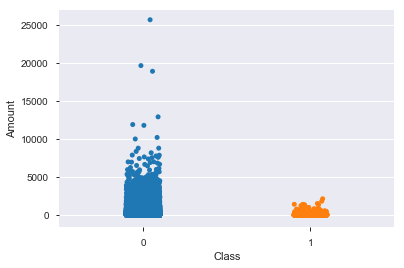

In [53]:
sns.stripplot(df_cleaned['Class'], df_cleaned['Amount'])


## Train-Test Split

In [47]:
X = df_cleaned.drop(['Class'], axis=1)
y = df_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print("No. of samples in each training set:", X_train.shape[0])
print("No. of samples in each test set:", X_test.shape[0])

No. of samples in each training set: 198608
No. of samples in each test set: 85118


0.0016665995327479256

In [36]:
len(X)/2

under = RandomUnderSampler(1/4, random_state=10)
X_under, y_under = under.fit_resample(X_train, y_train) 

over_under = SMOTE(random_state=20)
X_mix, y_mix = over_under.fit_resample(under_X, under_y) 

In [37]:
sum(y_under)/len(y_under)

0.2

In [41]:
sum(y_mix)/len(y_mix)

0.5

In [39]:
len(y_mix)

2648

# Logistic Regression

In [24]:
# df_log_reg = df_cleaned.copy()

Train Precision: 0.9548816568047337
Train Recall: 0.9750755287009063
Train F1: 0.9648729446935723


Test Precision: 0.028929384965831435
Test Recall: 0.8943661971830986
Test F1: 0.056045895851721095


Confusion Matrix: 
TN: 80713 FP: 4263 FN: 15 TP: 127


(80713, 4263, 15, 127)

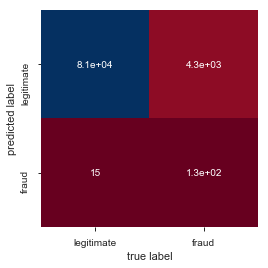

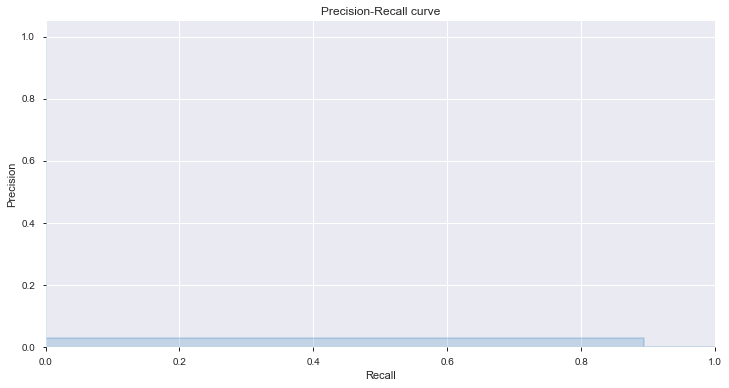

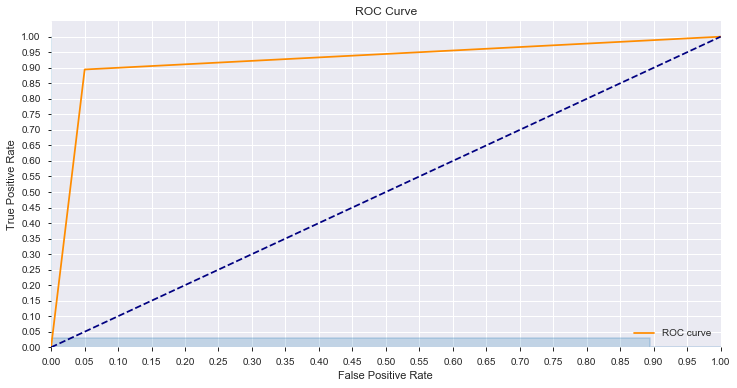

In [42]:
make_model(X_mix, y_mix, X_test, y_test, LogisticRegression(fit_intercept = False, C = 1e12, class_weight={0: 1, 1: 3}))

# Random Forest

Train Precision: 1.0
Train Recall: 0.9984894259818731
Train F1: 0.999244142101285


Test Precision: 0.13641618497109825
Test Recall: 0.8309859154929577
Test F1: 0.2343594836146971


Confusion Matrix: 
TN: 84229 FP: 747 FN: 24 TP: 118


(84229, 747, 24, 118)

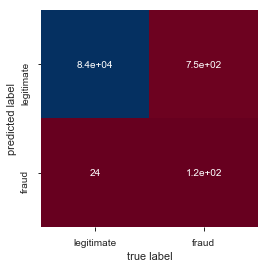

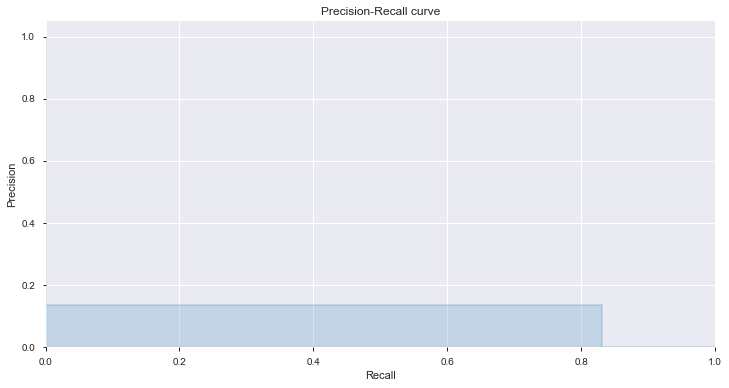

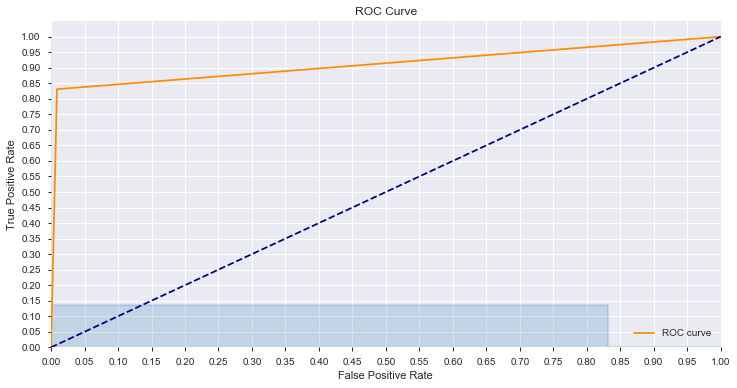

In [43]:
make_model(X_mix, y_mix, X_test, y_test, RandomForestClassifier(max_depth=10, class_weight={0: 1, 1: 3}))



In [ ]:
smote = SMOTE(random_state=1)
classifier = RandomForestClassifier(class_weight={0: 1, 1: 3})

from imblearn.pipeline import Pipeline

pipe = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {
    
#     'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [8, 10, 12],
    'classifier__min_samples_split': [8, 10, 12],
    'classifier__n_estimators':[10, 30, 100]
}

gs = GridSearchCV(pipe, param_grid, cv = 5, scoring='f1')
gs.fit(X_train, y_train)


In [ ]:
gs.best_params_

## Bagged Trees

In [61]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Train Precision: 0.9966101694915255
Train Recall: 0.8882175226586103
Train F1: 0.9392971246006391


Test Precision: 0.19055374592833876
Test Recall: 0.823943661971831
Test F1: 0.3095238095238095


Confusion Matrix: 
TN: 84479 FP: 497 FN: 25 TP: 117


(84479, 497, 25, 117)

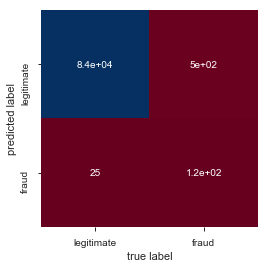

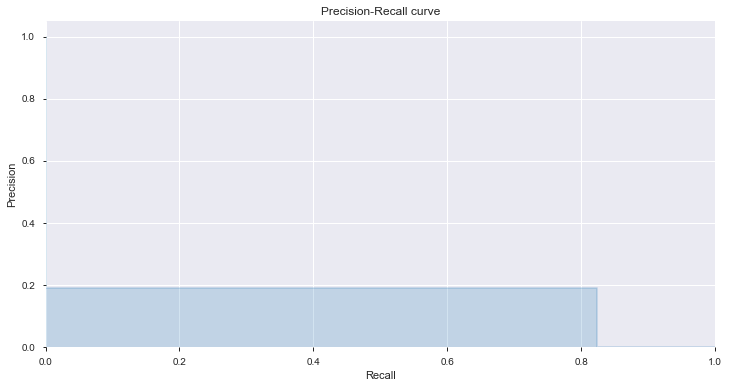

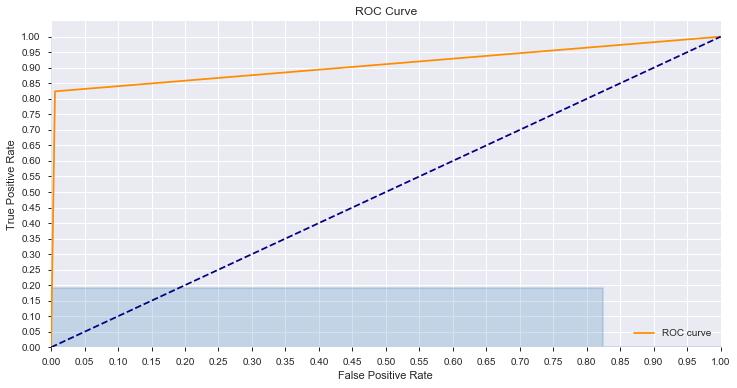

In [44]:
make_model(X_under, y_under, X_test, y_test, BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20))


# SVM

In [50]:
# from sklearn.svm import SVC

# make_model(X_under, y_under, X_test, y_test, SVC(kernel='linear', probability=True))